In [4]:
%matplotlib inline
#%matplotlib notebook


import pandas as pd
import numpy as np
import MajorMergerFunctions as mmf
import time
import matplotlib.pyplot as plt
import webbrowser
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
#import plotly.plotly as px




In [5]:
#DO NOT RUN AGAIN ABOVE THIS LINE
####################################################################################################

#RUN BELOW |||||||||||
#          VVVVVVVVVVV











In [6]:
#obs_data=pd.read_csv('/Users/spencershortt/TNG2019/observe_pairs_300.txt', sep="\t")
#thr_data=pd.read_csv('/Users/spencershortt/TNG2019/threeD_pairs_300.txt', sep="\t")
obs_data=pd.read_csv('/Users/spencershortt/TNG2019/observe_pairs_100.txt', sep="\t")
thr_data=pd.read_csv('/Users/spencershortt/TNG2019/threeD_pairs_100.txt', sep="\t")


observe_pairs=pd.DataFrame(obs_data)
threeD_pairs=pd.DataFrame(thr_data)

In [7]:
observe_pairs.head()

Unnamed: 0  Delta_k  GasMass     Pair_IDs   Rel_v_z  Separation     id  \
0           0   0.9499  2035.62  41619,41652  362.5043   17.348775  41619   
1           1   0.9499  2035.62  41619,41652  362.5043   17.348775  41652   
2           2   0.7097  2347.19  52647,52670   29.8930   13.167384  52647   
3           3   0.7097  2347.19  52647,52670   29.8930   13.167384  52670   
4           4   0.6944  2347.19  52652,52654  147.5650    5.780138  52652   

   mass_stars    pos_x    pos_y    pos_z       sfr  stellarphotometrics_k  \
0    3.434060  67401.8  60178.2  54388.2  3.015440               -23.8208   
1    1.429550  67419.1  60176.9  54399.1  0.000000               -22.8709   
2    1.705200  74324.6  18360.8  23994.5  0.000000               -22.9893   
3    0.965868  74329.3  18373.1  24094.6  0.000000               -22.2796   
4    1.740750  74590.7  18196.3  23777.6  0.367922               -23.4627   

     vel_x     vel_y      vel_z      sSFR  
0  225.400 -456.9200  -434.1990  0.878098  
1  -32.137  -86.7698   -71.6947  0.000000  
2 -445.024  518.2420  -296.4080  0.000000  
3 -538.816  348.7180  -266.5150  0.000000  
4  503.821 -362.3520 -1009.4400  0.211358

In [8]:
#GET RID OF UNNAMED COLUMN FULL OF NaN's

observe_pairs.drop(observe_pairs.columns[observe_pairs.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
threeD_pairs.drop(threeD_pairs.columns[threeD_pairs.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [9]:
observe_pairs.head()

Delta_k  GasMass     Pair_IDs   Rel_v_z  Separation     id  mass_stars  \
0   0.9499  2035.62  41619,41652  362.5043   17.348775  41619    3.434060   
1   0.9499  2035.62  41619,41652  362.5043   17.348775  41652    1.429550   
2   0.7097  2347.19  52647,52670   29.8930   13.167384  52647    1.705200   
3   0.7097  2347.19  52647,52670   29.8930   13.167384  52670    0.965868   
4   0.6944  2347.19  52652,52654  147.5650    5.780138  52652    1.740750   

     pos_x    pos_y    pos_z       sfr  stellarphotometrics_k    vel_x  \
0  67401.8  60178.2  54388.2  3.015440               -23.8208  225.400   
1  67419.1  60176.9  54399.1  0.000000               -22.8709  -32.137   
2  74324.6  18360.8  23994.5  0.000000               -22.9893 -445.024   
3  74329.3  18373.1  24094.6  0.000000               -22.2796 -538.816   
4  74590.7  18196.3  23777.6  0.367922               -23.4627  503.821   

      vel_y      vel_z      sSFR  
0 -456.9200  -434.1990  0.878098  
1  -86.7698   -71.6947  0.000000  
2  518.2420  -296.4080  0.000000  
3  348.7180  -266.5150  0.000000  
4 -362.3520 -1009.4400  0.211358

In [10]:
observe_pairs[observe_pairs.isnull().any(axis=1)].tail()
#observe_pairs[observe_pairs.isnull().any(axis=1)].id.values

Delta_k    GasMass                     Pair_IDs  Rel_v_z  Separation  \
56      NaN  134.42700  256511,256518,256519,256522      NaN         NaN   
57      NaN  134.42700  256511,256518,256519,256522      NaN         NaN   
74      NaN    7.59391         383945,383947,383950      NaN         NaN   
75      NaN    7.59391         383945,383947,383950      NaN         NaN   
76      NaN    7.59391         383945,383947,383950      NaN         NaN   

        id  mass_stars    pos_x     pos_y    pos_z       sfr  \
56  256519    0.485863  11383.4  23834.80  26285.7  3.882980   
57  256522    0.475083  11382.7  23839.50  26276.6  7.989240   
74  383945    3.685630  47517.9   4935.29  40967.5  0.000000   
75  383947    1.677410  47522.5   4919.29  40971.0  0.000000   
76  383950    0.750478  47511.1   4933.20  40984.7  0.160435   

    stellarphotometrics_k    vel_x    vel_y      vel_z       sSFR  
56               -23.0727 -102.073 -395.052 -236.36300   7.991924  
57               -23.4289 -117.408 -492.969 -193.88900  16.816514  
74               -23.7877  165.786 -205.465  -85.71910   0.000000  
75               -22.8117  188.277 -231.127  139.18200   0.000000  
76               -22.4842  201.798 -580.074    8.19892   0.213777

In [11]:
#FIND ARRAY OF IDS WHO BELONG TO A GROUP
obs_groups=np.array(observe_pairs[observe_pairs.isnull().any(axis=1)].Pair_IDs.values,dtype=np.str)
obs_groups=np.char.split(obs_groups,sep=',')
obs_groups=np.concatenate(obs_groups)
obs_groups=np.int_(obs_groups)

thr_groups=np.array(threeD_pairs[threeD_pairs.isnull().any(axis=1)].Pair_IDs.values,dtype=np.str)
thr_groups=np.char.split(thr_groups,sep=',')
thr_groups=np.concatenate(thr_groups)
thr_groups=np.int_(thr_groups)

print(len(thr_groups))

9


In [12]:
observe_pairs["id"]=np.array(observe_pairs.id.values,dtype=int)
threeD_pairs["id"]=np.array(threeD_pairs.id.values,dtype=int)


#print(type(thr_groups[0]))
#print(type(threeD_pairs.id.values[0]))
#test2=np.array(threeD_pairs.id.values,dtype=int)
#print(type(test2[0]))
#threeD_pairs

In [13]:
observe_pairs=observe_pairs[~observe_pairs.id.isin(obs_groups)]
threeD_pairs=threeD_pairs[~threeD_pairs.id.isin(thr_groups)]


#observe_pairs=observe_pairs.reset_index()
#threeD_pairs=threeD_pairs.reset_index()


In [14]:
observe_pairs

Delta_k     GasMass       Pair_IDs    Rel_v_z  Separation      id  \
0     0.9499  2035.62000    41619,41652  362.50430   17.348775   41619   
1     0.9499  2035.62000    41619,41652  362.50430   17.348775   41652   
2     0.7097  2347.19000    52647,52670   29.89300   13.167384   52647   
3     0.7097  2347.19000    52647,52670   29.89300   13.167384   52670   
4     0.6944  2347.19000    52652,52654  147.56500    5.780138   52652   
5     0.6944  2347.19000    52652,52654  147.56500    5.780138   52654   
6     0.6725  2021.67000    60783,60818  306.66700   12.605158   60783   
7     0.6725  2021.67000    60783,60818  306.66700   12.605158   60818   
11    0.6880  1959.00000    88715,88774  469.10110   16.026229   88715   
13    0.0322  1722.45000    96511,96518  597.88300   11.882223   96511   
14    0.0322  1722.45000    96511,96518  597.88300   11.882223   96518   
18    0.1073   862.85700  137896,559837  297.75300   19.340372  137896   
19    0.1073     0.00000  137896,559837  297.75300   19.340372  559837   
23    0.9167   266.60400  146180,146189  143.70000   10.804166  146180   
24    0.9167   266.60400  146180,146189  143.70000   10.804166  146189   
25    0.5025   266.60400  146191,146223  186.84800   19.137920  146191   
26    0.5025   266.60400  146191,146223  186.84800   19.137920  146223   
27    0.1175   651.34400  154499,512170  661.94800   15.791770  154499   
28    0.1175     0.00000  154499,512170  661.94800   15.791770  512170   
29    0.9201   549.79200  168400,168418   85.26520   10.711676  168400   
30    0.9201   549.79200  168400,168418   85.26520   10.711676  168418   
31    0.2655   452.51800  175246,175251  427.77600   13.865425  175246   
32    0.2655   452.51800  175246,175251  427.77600   13.865425  175251   
33    0.9190   187.75200  220565,220566  256.35900   11.548749  220565   
34    0.9190   187.75200  220565,220566  256.35900   11.548749  220566   
35    0.4890   187.75200  220570,220587   71.04820    2.832402  220570   
36    0.4890   187.75200  220570,220587   71.04820    2.832402  220587   
37    0.0510   250.33700  226200,226211  319.42390    5.979431  226200   
38    0.0510   250.33700  226200,226211  319.42390    5.979431  226211   
39    0.0330   264.45300  227582,227587  246.33300   18.828967  227582   
..       ...         ...            ...        ...         ...     ...   
70    0.1780     7.59391  382257,382258  470.89900   14.516542  382257   
71    0.1780     7.59391  382257,382258  470.89900   14.516542  382258   
77    0.0857    14.85600  384534,384535   54.69222   10.624142  384534   
78    0.0857    14.85600  384534,384535   54.69222   10.624142  384535   
79    0.1684     8.71610  389704,389705  178.98100    4.167733  389704   
80    0.1684     8.71610  389704,389705  178.98100    4.167733  389705   
81    0.4950     9.56517  407320,407322  160.91540   10.554620  407320   
82    0.4950     9.56517  407320,407322  160.91540   10.554620  407322   
83    0.9853     8.41297  417281,417283    0.51820    1.226418  417281   
84    0.9853     8.41297  417281,417283    0.51820    1.226418  417283   
85    0.7476     0.00000  435223,435225  133.92840    8.022194  435223   
86    0.7476     0.00000  435223,435225  133.92840    8.022194  435225   
87    0.8899     0.00000  438669,438671   74.38710   12.257651  438669   
88    0.8899     0.00000  438669,438671   74.38710   12.257651  438671   
89    0.1182     0.00000  442299,442301  145.40900   15.363919  442299   
90    0.1182     0.00000  442299,442301  145.40900   15.363919  442301   
91    0.8700     0.00000  449733,449735    2.57100    8.814193  449733   
92    0.8700     0.00000  449733,449735    2.57100    8.814193  449735   
93    0.6413     0.00000  452045,452048   30.79600   10.753609  452045   
94    0.6413     0.00000  452045,452048   30.79600   10.753609  452048   
95    0.2351     0.00000  463062,463063   89.67300    5.412024  463062   
96    0.2351     0.00000  463062,463063   89.67300    5.412024  463063   
97    0.9

In [15]:
threeD_pairs

GasMass  Mass_Ratio       Pair_IDs       Rel_v  Separation      id  \
0   2347.19000    1.083068    52652,52654  461.216560   11.291590   52652   
1   2347.19000    1.083068    52652,52654  461.216560   11.291590   52654   
5    264.45300    1.511579  227582,227587  319.184095   18.924587  227582   
6    264.45300    1.511579  227582,227587  319.184095   18.924587  227587   
7    153.03900    1.440999  248165,248167  484.035890   18.124569  248165   
8    153.03900    1.440999  248165,248167  484.035890   18.124569  248167   
9     95.03440    2.116759  299430,299433  133.930960   14.375674  299430   
10    95.03440    2.116759  299430,299433  133.930960   14.375674  299433   
11     7.59391    2.197215  383945,383947  227.475027   17.012055  383945   
12     7.59391    2.197215  383945,383947  227.475027   17.012055  383947   
13     0.00000    2.206063  435223,435225  158.692817    8.919955  435223   
14     0.00000    2.206063  435223,435225  158.692817    8.919955  435225   
15     0.00000    2.404295  449733,449735  153.456600   13.032651  449733   
16     0.00000    2.404295  449733,449735  153.456600   13.032651  449735   
17     0.00000    1.402786  463062,463063  128.058924   16.606625  463062   
18     0.00000    1.402786  463062,463063  128.058924   16.606625  463063   
19     0.00000    2.263060  504757,504758  178.358007   13.040322  504757   
20     0.00000    2.263060  504757,504758  178.358007   13.040322  504758   

    mass_stars     pos_x     pos_y    pos_z       sfr  stellarphotometrics_k  \
0     1.740750  74590.70  18196.30  23777.6  0.367922               -23.4627   
1     1.607240  74594.20  18200.90  23787.3  0.000000               -22.7683   
5     1.306180  48614.30  32615.10  28383.3  0.000000               -23.6222   
6     0.864116  48633.00  32617.30  28381.4  6.954850               -23.5892   
7     1.068930  51597.10  70190.30  11026.1  0.000000               -23.1910   
8     0.741798  51608.70  70176.60  11023.6  2.279520               -23.0167   
9     4.351020  26792.20  61486.30  53899.2  0.000788               -23.8008   
10    2.055510  26802.60  61479.80  53906.7  0.000000               -23.3116   
11    3.685630  47517.90   4935.29  40967.5  0.000000               -23.7877   
12    1.677410  47522.50   4919.29  40971.0  0.000000               -22.8117   
13    3.043440   4644.89  43921.40  53848.1  0.008568               -23.8008   
14    1.379580   4650.73  43926.90  53844.2  0.304778               -23.0532   
15    3.638780  40217.30  36986.90  59359.2  0.000000               -23.8094   
16    1.513450  40217.80  36995.70  59368.8  0.000000               -22.9394   
17    2.023350  65555.70  53440.20  56049.6  2.594450               -23.7996   
18    1.442380  65550.50  53438.70  56065.3  3.077600               -23.5645   
19    1.119590  63755.60  46392.40  60840.8  4.366040               -23.3140   
20    0.494724  63764.80  46394.50  60831.8  1.589920               -22.4702   

       vel_x     vel_y      vel_z      sSFR  
0   503.8210 -362.3520 -1009.4400  0.211358  
1   820.8490 -663.0820  -861.8750  0.000000  
5   277.4420  -90.1154   189.2150  0.000000  
6   204.6370 -279.5830   435.5480  8.048514  
7   -23.5024 -154.1670   221.0440  0.000000  
8   141.4860  275.7820    72.0023  3.072966  
9  -176.1650 -394.5000   123.1890  0.000181  
10 -185.9710 -526.3700   144.4410  0.000000  
11  165.7860 -205.4650   -85.7191  0.000000  
12  188.2770 -231.1270   139.1820  0.000000  
13  207.0140  235.9540   109.0970  0.002815  
14  138.0670  186.0250   -24.8314  0.220921  
15  -52.4846  273.7050  -287.4970  0.000000  
16 -151.0560  156.1210  -290.0680  0.000000  
17  246.5910  158.0290  -524.3970  1.282255  
18  296.9030   81.6972  -614.0700  2.133696  
19   82.2806   76.3949  -219.8310  3.899678  
20  -59.6479  182.2980  -241.1010  3.213752

In [16]:
print(threeD_pairs.Pair_IDs.values)

['52652,52654' '52652,52654' '227582,227587' '227582,227587'
 '248165,248167' '248165,248167' '299430,299433' '299430,299433'
 '383945,383947' '383945,383947' '435223,435225' '435223,435225'
 '449733,449735' '449733,449735' '463062,463063' '463062,463063'
 '504757,504758' '504757,504758']


In [17]:
threeD_pairs.to_csv('/Users/spencershortt/TNG2019/reduced_3d_pairs.txt', sep="\t")

#dt=pd.DataFrame(pd.read_csv('/Users/spencershortt/TNG2019/reduced_3d_pairs.txt', sep="\t"))
#dt.head()
#Try to get rid of triples

#observe_pairs=observe_pairs.dropna()
#observe_pairs=observe_pairs.reset_index()
#threeD_pairs=threeD_pairs.dropna()
#threeD_pairs=threeD_pairs.reset_index()

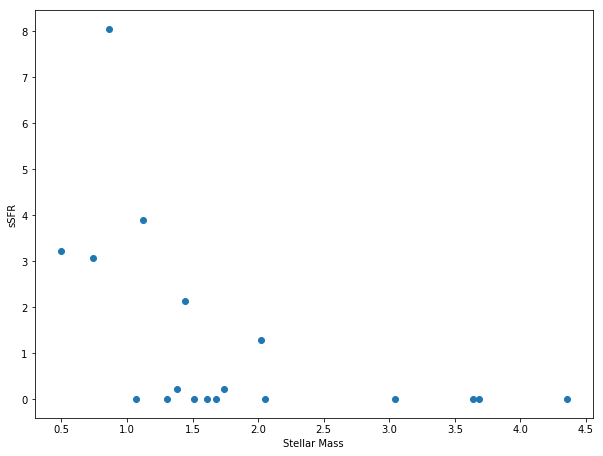

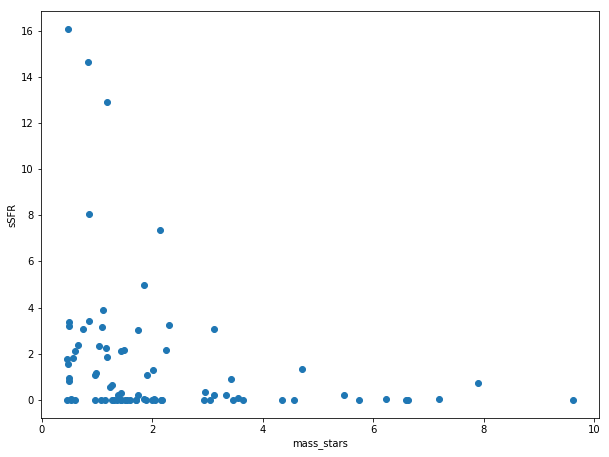

In [18]:
f1, ax= plt.subplots(1,1,figsize=(10,7.5))
scatter1=ax.scatter(threeD_pairs["mass_stars"],threeD_pairs["sSFR"])
ax.set_xlabel("Stellar Mass")
ax.set_ylabel("sSFR")
ax.invert_xaxis
#fig.colorbar(scatter, ax=axes)


f2, ax2= plt.subplots(1,1,figsize=(10,7.5))
scatter2=ax2.scatter(observe_pairs["mass_stars"],observe_pairs["sSFR"])
ax2.set_xlabel("mass_stars")
ax2.set_ylabel("sSFR")
ax2.invert_xaxis

plt.show()

In [19]:
#pd.plotting.scatter_matrix(threeD_pairs, figsize=(15, 15),
#                           marker='o', hist_kwds={'bins': 20}, s=60,
#                           alpha=.8)

<bound method _AxesBase.invert_xaxis of <matplotlib.axes._subplots.AxesSubplot object at 0x10c3742b0>>

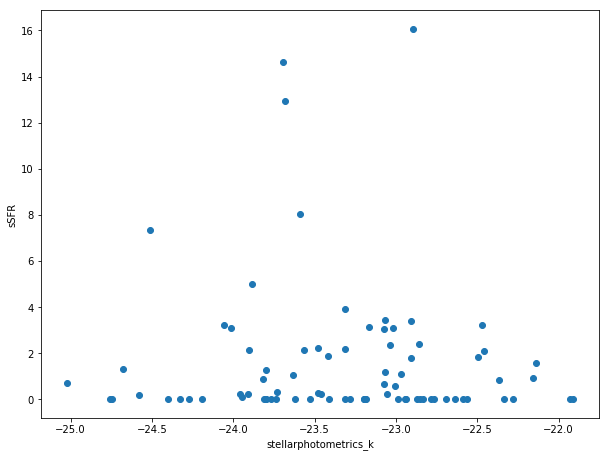

In [20]:
f3, ax3= plt.subplots(1,1,figsize=(10,7.5))
scatter3=ax3.scatter(observe_pairs["stellarphotometrics_k"],observe_pairs["sSFR"])
ax3.set_xlabel("stellarphotometrics_k")
ax3.set_ylabel("sSFR")
ax3.invert_xaxis

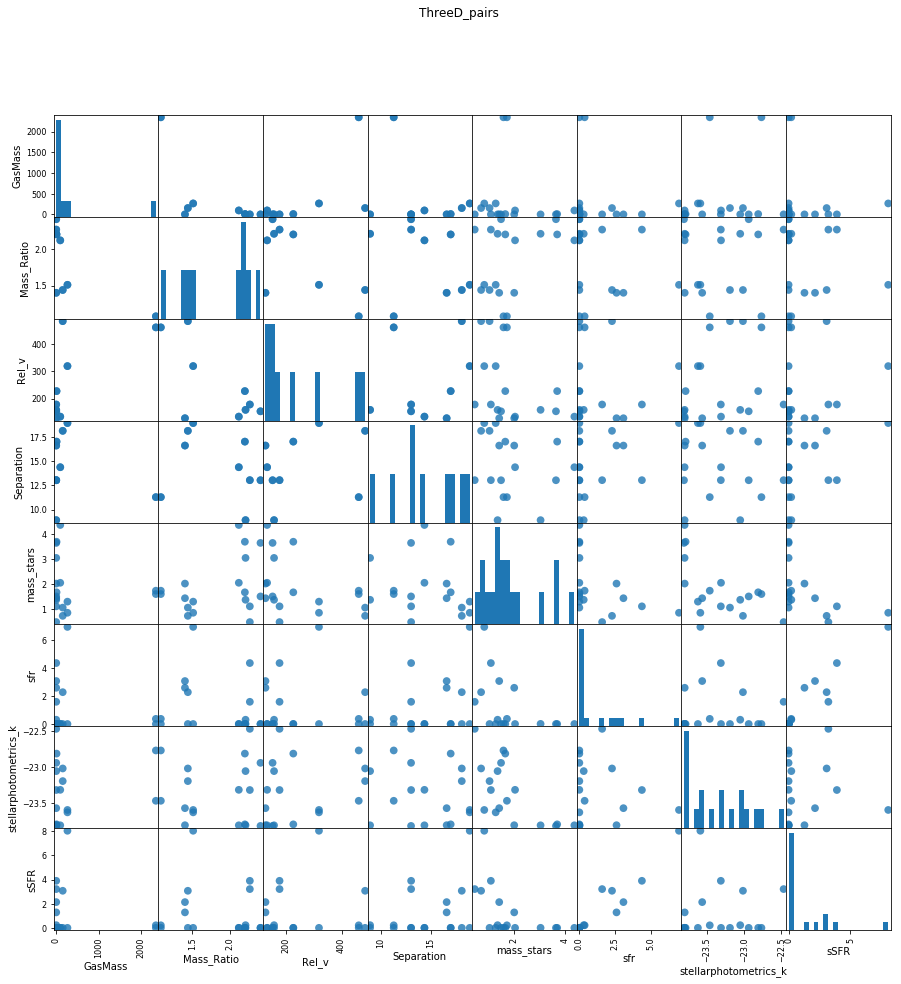

In [21]:
fig=pd.plotting.scatter_matrix(threeD_pairs.drop(["id","pos_x","pos_y","pos_z","vel_x","vel_y","vel_z"],axis=1) , figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8)
plt.suptitle("ThreeD_pairs")
plt.savefig('/Users/spencershortt/TNG2019/threeD_matrix_plot.png')

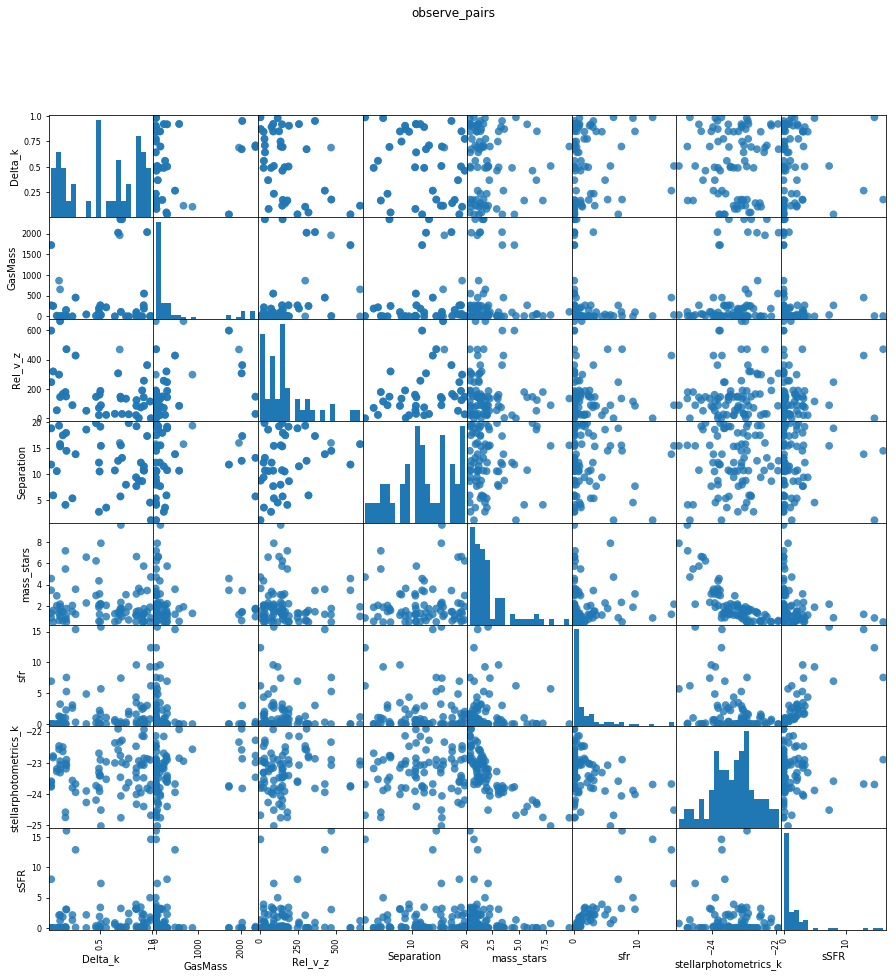

In [22]:
fig=pd.plotting.scatter_matrix(observe_pairs.drop(["id","pos_x","pos_y","pos_z","vel_x","vel_y","vel_z"],axis=1) , figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8)
plt.suptitle("observe_pairs")
plt.savefig('/Users/spencershortt/TNG2019/observe_matrix_plot2.png')

<bound method _AxesBase.invert_xaxis of <matplotlib.axes._subplots.AxesSubplot object at 0x1144272e8>>

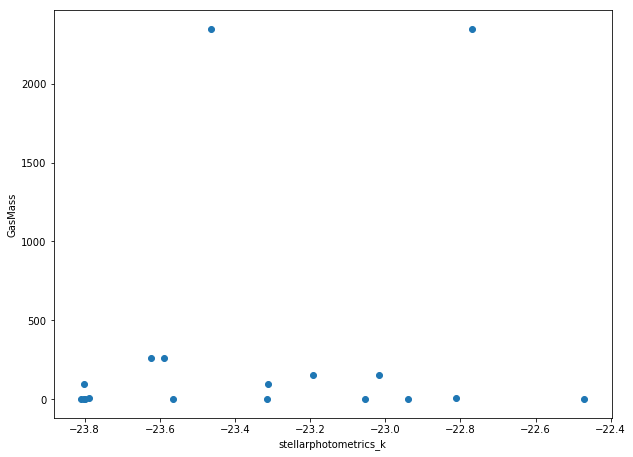

In [23]:
f4, ax4= plt.subplots(1,1,figsize=(10,7.5))
scatter4=ax4.scatter(threeD_pairs["stellarphotometrics_k"],threeD_pairs["GasMass"])
ax4.set_xlabel("stellarphotometrics_k")
ax4.set_ylabel("GasMass")
ax4.invert_xaxis

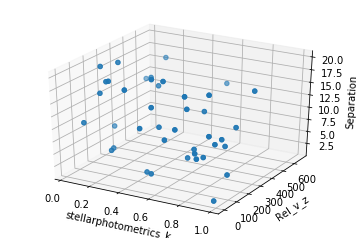

In [24]:


threedee = plt.figure().gca(projection='3d')
threedee.scatter(observe_pairs["Delta_k"], observe_pairs["Rel_v_z"], observe_pairs["Separation"])
threedee.set_xlabel("stellarphotometrics_k")
threedee.set_ylabel("Rel_v_z")
threedee.set_zlabel("Separation")
plt.show()


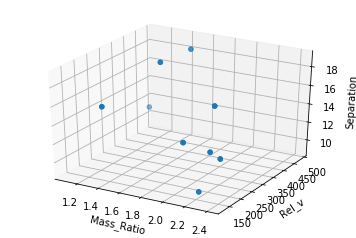

In [25]:
threedee2 = plt.figure().gca(projection='3d')
threedee2.scatter(threeD_pairs["Mass_Ratio"], threeD_pairs["Rel_v"], threeD_pairs["Separation"])
threedee2.set_xlabel("Mass_Ratio")
threedee2.set_ylabel("Rel_v")
threedee2.set_zlabel("Separation")
plt.show()

In [26]:
#import plotly.express as px


#iris = threeD_pairs[['sSFR','GasMass','stellarphotometrics_k']]
#iris = px.data.iris()
#fig = px.scatter_3d(iris, x='sepal_length', y='sepal_width', z='petal_width',
 #             color='species')
#fig.show()

In [27]:




#test=df[df.id.isin([41619,41652])]
#test_sSFR=test.sfr.values/test.mass_stars.values
#print(test_sSFR)


#test.iloc[0].loc["pos_x"]
#observe_pairs
threeD_pairs[['sSFR','GasMass','stellarphotometrics_k']]

sSFR     GasMass  stellarphotometrics_k
0   0.211358  2347.19000               -23.4627
1   0.000000  2347.19000               -22.7683
5   0.000000   264.45300               -23.6222
6   8.048514   264.45300               -23.5892
7   0.000000   153.03900               -23.1910
8   3.072966   153.03900               -23.0167
9   0.000181    95.03440               -23.8008
10  0.000000    95.03440               -23.3116
11  0.000000     7.59391               -23.7877
12  0.000000     7.59391               -22.8117
13  0.002815     0.00000               -23.8008
14  0.220921     0.00000               -23.0532
15  0.000000     0.00000               -23.8094
16  0.000000     0.00000               -22.9394
17  1.282255     0.00000               -23.7996
18  2.133696     0.00000               -23.5645
19  3.899678     0.00000               -23.3140
20  3.213752     0.00000               -22.4702

In [28]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(observe_pairs)

#r=mmf.distance_2d(observe_pairs[observe_pairs["id"]==41619].pos_x.item(),observe_pairs[observe_pairs["id"]==41619].pos_y.item(),
 #                observe_pairs[observe_pairs["id"]==41652].pos_x.item(),
  #               observe_pairs[observe_pairs["id"]==41652].pos_y.item())
#print(r)


In [29]:
#observe_pairs.tail()

In [30]:
#i=0
#for sfr in observe_pairs.sfr:
#    if sfr==0:
 #       i+=1
#print(i)
#observe_pairs.columns.values 
#observe_pairs = observe_pairs.drop('Unnamed: 11', 1)
#observe_pairs = observe_pairs.loc[:, ~observe_pairs.columns.str.contains('^Unnamed')]
#threeD_pairs = threeD_pairs.loc[:, ~threeD_pairs.columns.str.contains('^Unnamed')]


#observe_pairs.drop(observe_pairs.columns[observe_pairs.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
#threeD_pairs.drop(threeD_pairs.columns[threeD_pairs.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

       

In [31]:

#webbrowser.open("http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/"+str(41619)+"/skirt/image_g_sdss.png", new=2)
#observe_pairs.head()

In [32]:
#print(len(observe_pairs.id.values))
#counter=0
#for id in observe_pairs.id:
    #print(id)
 #   counter+=1
#print(counter)    
    #print("http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/"+str(id)+"/skirt/image_g_sdss.png")
 #   webbrowser.open("http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/"+str(id)+"/skirt/image_g_sdss.png")

In [33]:
'''
no_pic_list=[60818,
88774,
137910,
137919,
146223,
168418,
175246,
220587,
226211,
227582,
227587,
248165,
248167,
299430]'''

'\nno_pic_list=[60818,\n88774,\n137910,\n137919,\n146223,\n168418,\n175246,\n220587,\n226211,\n227582,\n227587,\n248165,\n248167,\n299430]'

In [34]:
#no_pic=observe_pairs[observe_pairs.id.isin(no_pic_list)]
#no_pic

In [35]:
#observe_pairs.Pair_IDs.values

In [36]:
#pd.plotting.scatter_matrix(observe_pairs, figsize=(15, 15),
 #                          marker='o', hist_kwds={'bins': 20}, s=60,
  #                         alpha=.8)# c=y_train,

In [37]:
morph_data = pd.read_excel('/Users/spencershortt/Documents/morph_data.xlsx')
morphs=pd.DataFrame(morph_data)
morphs.head()

id    Gini     M20     F     C     n
0  41619  0.4418 -1.5629 -0.69  2.34  0.60
1  41652  0.4200 -1.5400 -0.81  2.27  0.70
2  52647  0.6000 -2.0500  0.41  3.66  2.90
3  52652  0.4700 -1.5400 -0.56  2.47  2.59
4  52670  0.5100 -1.7000 -0.25  2.73  1.69

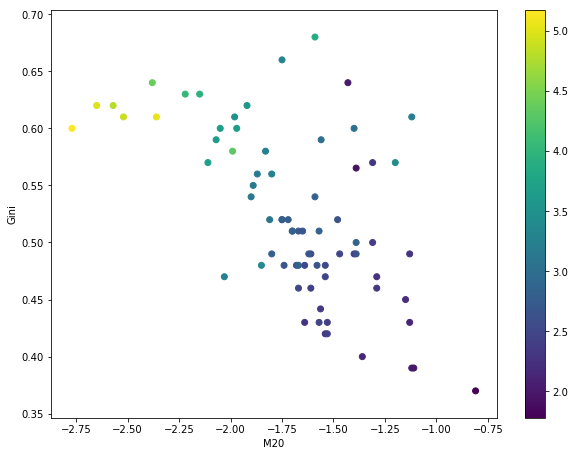

In [38]:
fig, axes=plt.subplots(1,1,figsize=(10,7.5))
scatter=axes.scatter(morphs["M20"],morphs["Gini"], c=morphs["C"])
axes.set_xlabel("M20")
axes.set_ylabel("Gini")
axes.invert_xaxis
fig.colorbar(scatter, ax=axes)


In [39]:

#threeD_pairs

In [40]:
#print(threeD_pairs.id.values)

In [41]:
#observe_pairs

In [42]:
#observe_pairs[observe_pairs.isnull().any(axis=1)].id.values

In [43]:
#threeD_pairs[threeD_pairs.isnull().any(axis=1)]

In [44]:
#observe_pairs=observe_pairs.dropna()
#observe_pairs=observe_pairs.reset_index()
#threeD_pairs=threeD_pairs.dropna()
#threeD_pairs=threeD_pairs.reset_index()

In [45]:
#print(threeD_pairs.id.values)

In [46]:
#threeD_pairs

In [47]:
#pair_ids=[]
#for n in threeD_pairs['Pair_IDs']:
 #   pair
#print(threeD_pairs.id.values)
#print(threeD_pairs.Pair_IDs.values)

In [48]:
#%store observe_pairs
#%store threeD_pairs